In [1]:
%run ../chap12/rnn_ext_model.ipynb
%run ../chap12/dataset_videoshot.ipynb

In [2]:
vsd  = VideoShotDataset(['AStarIsBorn1937.mp4'])
print(vsd)

AStarIsBorn1937.mp4: cache file is found => use cache
Creating thumbnail cache is done
videoshot(binary, 400 frames, 100.0 shots, 2000 train_data)


Model vsm1 train started:
    Epoch 2: cost=0.667, accuracy=0.615/0.610 (9/9 secs)
    Epoch 4: cost=0.662, accuracy=0.626/0.562 (11/20 secs)
    Epoch 6: cost=0.660, accuracy=0.627/0.637 (9/29 secs)
    Epoch 8: cost=0.657, accuracy=0.624/0.598 (11/40 secs)
    Epoch 10: cost=0.584, accuracy=0.676/0.693 (10/50 secs)
Model vsm1 train ended in 50 secs:
Model vsm1 test report: accuracy = 0.748, (0 secs)

Model vsm1 Visualization


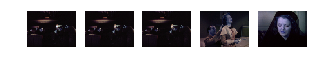

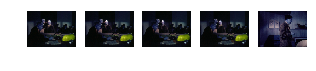

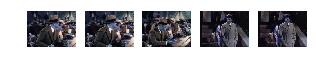

Est: 0.49,0.47,0.78,0.82
Ans: 0.00,0.00,1.00,1.00
Est: 0.51,0.45,0.42,0.76
Ans: 0.00,0.00,0.00,1.00
Est: 0.48,0.47,0.48,0.47
Ans: 0.00,1.00,1.00,0.00


In [3]:
conf1 = \
    [['seqwrap', ['avg',{'stride':30}],
                 ['conv',{'ksize':3, 'chn':12}],
                 ['full', {'width':16}]],
    ['lstm', {'recur_size':8}]]
    
vsm1 = RnnExtModel('vsm1', vsd, conf1)
vsm1.exec_all(epoch_count=10, report=2, show_cnt=3)

Model vsm1_6 train started:
    Epoch 2: cost=0.659, accuracy=0.630/0.594 (12/12 secs)
    Epoch 4: cost=0.662, accuracy=0.623/0.622 (11/23 secs)
    Epoch 6: cost=0.637, accuracy=0.636/0.666 (13/36 secs)
    Epoch 8: cost=0.572, accuracy=0.654/0.672 (12/48 secs)
    Epoch 10: cost=0.509, accuracy=0.734/0.808 (11/59 secs)
Model vsm1_6 train ended in 59 secs:
Model vsm1_6 test report: accuracy = 0.761, (0 secs)

Model vsm1_6 Visualization


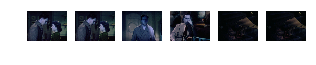

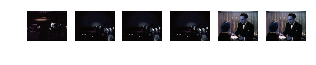

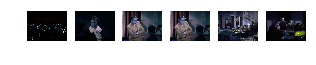

Est: 0.41,0.46,0.94,0.65,0.44
Ans: 0.00,1.00,1.00,1.00,0.00
Est: 0.36,0.38,0.37,0.88,0.53
Ans: 1.00,0.00,0.00,1.00,0.00
Est: 0.87,0.66,0.48,0.49,0.40
Ans: 1.00,1.00,0.00,1.00,1.00


In [4]:
vsd.set_timesteps(6)

vsm1_6 = RnnExtModel('vsm1_6', vsd, conf1)
vsm1_6.exec_all(epoch_count=10, report=2, show_cnt=3)

vsd.set_timesteps(5)

Model vsm2 train started:
    Epoch 2: cost=0.661, accuracy=0.628/0.610 (12/12 secs)
    Epoch 4: cost=0.663, accuracy=0.623/0.652 (9/21 secs)
    Epoch 6: cost=0.664, accuracy=0.620/0.655 (9/30 secs)
    Epoch 8: cost=0.657, accuracy=0.630/0.637 (12/42 secs)
    Epoch 10: cost=0.642, accuracy=0.610/0.627 (9/51 secs)
Model vsm2 train ended in 51 secs:
Model vsm2 test report: accuracy = 0.635, (0 secs)

Model vsm2 Visualization


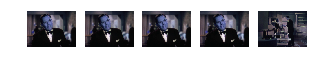

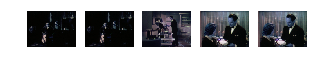

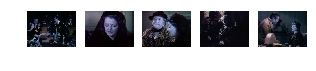

Est: 0.55,0.55,0.55,0.66
Ans: 0.00,0.00,0.00,1.00
Est: 0.54,0.60,0.51,0.49
Ans: 0.00,1.00,1.00,0.00
Est: 0.71,0.69,0.64,0.72
Ans: 1.00,1.00,1.00,1.00


In [5]:
conf2 = \
    [['seqwrap', ['avg',{'stride':30}],
                 ['conv',{'ksize':3, 'chn':12}],
                 ['full', {'width':16}]],
    ['lstm', {'recur_size':8}],
    ['lstm', {'recur_size':4}]]
    
vsm2 = RnnExtModel('vsm2', vsd, conf2)
vsm2.exec_all(epoch_count=10, report=2, show_cnt=3)

Model vsm3 train started:
    Epoch 2: cost=0.665, accuracy=0.619/0.610 (84/84 secs)
    Epoch 4: cost=0.661, accuracy=0.625/0.598 (85/169 secs)
    Epoch 6: cost=0.658, accuracy=0.628/0.608 (85/254 secs)
    Epoch 8: cost=0.624, accuracy=0.650/0.635 (87/341 secs)
    Epoch 10: cost=0.559, accuracy=0.688/0.733 (86/427 secs)
Model vsm3 train ended in 427 secs:
Model vsm3 test report: accuracy = 0.691, (1 secs)

Model vsm3 Visualization


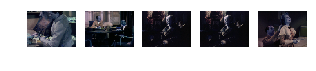

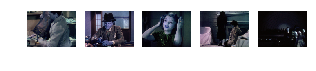

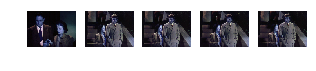

Est: 0.67,0.55,0.55,0.74
Ans: 1.00,1.00,0.00,1.00
Est: 0.55,0.72,0.67,0.74
Ans: 1.00,1.00,1.00,1.00
Est: 0.65,0.44,0.43,0.42
Ans: 1.00,0.00,0.00,0.00


In [6]:
conf3 = \
    [['seqwrap', ['conv',{'ksize':1, 'chn':4}],
                 ['max',{'stride':2}],
                 ['conv',{'ksize':1, 'chn':8}],
                 ['max',{'stride':3}],
                 ['conv',{'ksize':1, 'chn':16}],
                 ['avg',{'stride':5}],
                 ['full', {'width':12}]],
    ['lstm', {'recur_size':8}]]
    
vsm3 = RnnExtModel('vsm3', vsd, conf3)
vsm3.exec_all(epoch_count=10, report=2, show_cnt=3)

In [7]:
vsm1.exec_all(epoch_count=40, report=20, show_cnt=0)
vsm2.exec_all(epoch_count=40, report=20, show_cnt=0)
vsm3.exec_all(epoch_count=40, report=20, show_cnt=0)

Model vsm1 train started:
    Epoch 20: cost=0.270, accuracy=0.896/0.902 (105/105 secs)
    Epoch 40: cost=0.190, accuracy=0.934/0.915 (116/221 secs)
Model vsm1 train ended in 221 secs:
Model vsm1 test report: accuracy = 0.918, (0 secs)

Model vsm2 train started:
    Epoch 20: cost=0.263, accuracy=0.901/0.915 (106/106 secs)
    Epoch 40: cost=0.222, accuracy=0.920/0.953 (103/209 secs)
Model vsm2 train ended in 209 secs:
Model vsm2 test report: accuracy = 0.932, (0 secs)

Model vsm3 train started:
    Epoch 20: cost=0.304, accuracy=0.892/0.927 (827/827 secs)
    Epoch 40: cost=0.217, accuracy=0.926/0.943 (788/1615 secs)
Model vsm3 train ended in 1615 secs:
Model vsm3 test report: accuracy = 0.941, (1 secs)

